In [2]:
import pandas as pd

In [3]:
hotels = pd.read_csv('hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [4]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [5]:
 # убираем признаки которые еще не успели обработать, 
 # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
 object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
 hotels.drop(object_columns, axis = 1, inplace=True)

 # заполняем пропуски самым простым способом
 hotels = hotels.fillna(0)

In [6]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [7]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [8]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [10]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.14142193957837604


Небольшой бонус:


In [11]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)

Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.

In [12]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts','total_number_of_reviews_reviewer_has_given', 'additional_number_of_scoring']

# категориальные признаки
cat_cols = ['average_score', 'lat']

<AxesSubplot:>

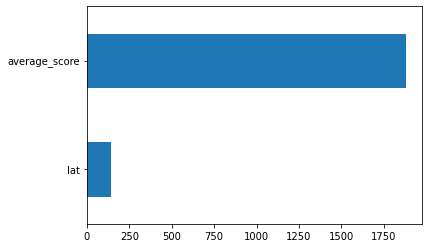

In [13]:
y=y.astype('int')


from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot:>

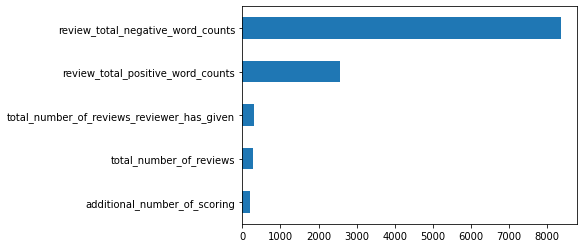

In [14]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

### Очистка данных для улучшения MAPE

In [15]:
hotels2 = pd.read_csv('hotels.csv')
hotels2.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [16]:
#Определяем количество отелей в выборке
hotels2['hotel_name'].nunique()

1492

### Работаем с датами

In [17]:
#Преобразуем дату в подходящий формат
hotels2['review_date'] = pd.to_datetime(hotels2['review_date'], format = '%m/%d/%Y')

In [18]:
hotels2['review_date'].min()

Timestamp('2015-08-04 00:00:00')

In [19]:
hotels2['review_date'].max()

Timestamp('2017-08-03 00:00:00')

In [20]:
hotels2['year'] = hotels2['review_date'].dt.year
hotels2['month'] = hotels2['review_date'].dt.month

### Работаем с тегами

In [21]:
# Смотрим как выглядят наши данные
hotels2['tags']

0         [' Leisure trip ', ' Couple ', ' Studio Suite ...
1         [' Business trip ', ' Couple ', ' Standard Dou...
2         [' Leisure trip ', ' Solo traveler ', ' Modern...
3         [' Leisure trip ', ' Solo traveler ', ' Standa...
4         [' Business trip ', ' Couple ', ' Standard Dou...
                                ...                        
386798    [' Leisure trip ', ' Group ', ' Club Double or...
386799    [' Leisure trip ', ' Couple ', ' Standard Doub...
386800    [' Business trip ', ' Solo traveler ', ' Singl...
386801    [' Leisure trip ', ' Solo traveler ', ' Deluxe...
386802    [' Leisure trip ', ' Couple ', ' Bunk Bed Room...
Name: tags, Length: 386803, dtype: object

In [22]:
# Формируем список со всеми тегами в нашей выборке
taglist = []

for i in hotels2['tags']:
    for j in (i.split(',')):
        taglist.append(j.replace("'","").replace("[","").replace("]","").strip())

In [23]:
# Формируем перечень уникальных тегов
tags = set(taglist)
tags

{'Superior Double Room 1 2 Adults',
 'Classic Room with Courtyard View',
 'King Grand Premier with Canal View',
 'Luxury One Bedroom Apartment',
 'Superior Queen Room with Courtyard Garden or City View',
 'Basic Twin Room',
 'Double Room 2 Adults 1 Child',
 'Studio Twin',
 'Prestige Double or Twin Room',
 'Superior Capucines Room',
 'Luxury 1 Bed Suite',
 'Executive Queen Room with Balcony',
 'Standard Room with Queen Bed Renovated',
 'Parisian Junior Suite',
 'Executive Queen Room with Sofa Bed 3 Adults',
 'Triple Room 2 Adults 1 Child',
 'Superior Room with Two Double Beds and View',
 'Executive Double Room with Air Conditioning',
 'King Junior Suite with Executive Lounge Access',
 'Executive Twin Room with Whirlpool',
 'Classic Twin Room',
 'Twin Room with Extra Bed',
 'Executive Twin Room with Access to Executive Lounge',
 'Premier Double or Twin Room',
 'Luxury Suite',
 'Double Suite',
 'The Level Grand Premium Double or Twin Room with City View',
 'Signature Luxury King with Balc

In [24]:
#Готовим создаем словарь
tag_dictionary = dict.fromkeys(tags, 0)
for j in taglist:
    tag_dictionary[j] += 1

In [25]:
#сортируем теги по уменьшению количества
value_key_pairs = ((value, key) for (key,value) in tag_dictionary.items())
tag_dictionary_sorted = sorted(value_key_pairs, reverse=True)
tag_dictionary_sorted = {k: v for v, k in tag_dictionary_sorted}

In [26]:
tag_dictionary_sorted

{'Leisure trip': 313593,
 'Submitted from a mobile device': 230778,
 'Couple': 189212,
 'Stayed 1 night': 145373,
 'Stayed 2 nights': 100263,
 'Solo traveler': 81235,
 'Stayed 3 nights': 72000,
 'Business trip': 61989,
 'Group': 49088,
 'Family with young children': 45836,
 'Stayed 4 nights': 35748,
 'Double Room': 26386,
 'Standard Double Room': 24151,
 'Superior Double Room': 23550,
 'Family with older children': 19802,
 'Deluxe Double Room': 18623,
 'Double or Twin Room': 16824,
 'Stayed 5 nights': 15611,
 'Standard Double or Twin Room': 13062,
 'Classic Double Room': 12716,
 'Superior Double or Twin Room': 10238,
 '2 rooms': 9287,
 'Stayed 6 nights': 7399,
 'Standard Twin Room': 7325,
 'Single Room': 7227,
 'Twin Room': 6279,
 'Stayed 7 nights': 5549,
 'Executive Double Room': 4763,
 'Classic Double or Twin Room': 4576,
 'Superior Twin Room': 4540,
 'Club Double Room': 4485,
 'Deluxe Double or Twin Room': 4465,
 'Queen Room': 4071,
 'Deluxe King Room': 3993,
 'Superior Queen Room':

In [27]:
# Пишем функцию которая будет выявлять количество ночей из тэгов
def nights(list):
    tags = []
    for j in (list.split(',')):
        tags.append(j.replace("'","").replace("[","").replace("]","").strip())

    for i in tags:
        if 'Stayed' in i:
            nights = (i[7])
        else:
            nights = 0
    
    return int(nights)
       

In [28]:
hotels2['nights'] = hotels2['tags'].apply(nights)

In [29]:
 # убираем признаки которые еще не успели обработать, 
 # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
 object_columns = [s for s in hotels2.columns if hotels2[s].dtypes == 'object']
 hotels2.drop(object_columns, axis = 1, inplace=True)

 # заполняем пропуски самым простым способом
 hotels2 = hotels2.fillna(0)
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels2.drop(['reviewer_score'], axis = 1)  
y = hotels2['reviewer_score'] 


In [30]:
X = X.drop(['review_date'], axis = 1)  

In [31]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13809351320954616
